In [1]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read data using pandas

In [2]:
#import avacado data files
df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/COVID19_Worldometer.csv")

In [3]:
df.head(2)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,4/18/2020,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,4/18/2020,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0


In [4]:
df.rename(columns={'Total Tests':'Total_Tests','Total Cases':'Total_Cases','Total Deaths':'Total_Deaths','Total Recovered':'Total_Recovered','Serious or Critical':'SeriousOrCritical','Active Cases':'Active_Cases'}, inplace=True)
print(df.columns)

Index(['Date', 'Country', 'Population', 'Total_Tests', 'Total_Cases',
       'Total_Deaths', 'Total_Recovered', 'SeriousOrCritical', 'Active_Cases'],
      dtype='object')


In [5]:
# Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6603 non-null   object 
 1   Country            6603 non-null   object 
 2   Population         6603 non-null   int64  
 3   Total_Tests        5505 non-null   float64
 4   Total_Cases        6554 non-null   float64
 5   Total_Deaths       5367 non-null   float64
 6   Total_Recovered    6318 non-null   float64
 7   SeriousOrCritical  4117 non-null   float64
 8   Active_Cases       6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [6]:
#distribution of categorical feature
df.describe(include=['O'])

,Date,Country
count,6603,6603
unique,31,213
top,4/27/2020,Grenada
freq,213,31


In [7]:
list(df.columns.values) 

['Date',
 'Country',
 'Population',
 'Total_Tests',
 'Total_Cases',
 'Total_Deaths',
 'Total_Recovered',
 'SeriousOrCritical',
 'Active_Cases']

In [8]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Date', 'Country', 'Population', 'Total_Tests', 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'SeriousOrCritical', 'Active_Cases']  

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column]) 

In [9]:
# replace NaN values

import numpy as np

df['Total_Tests'].replace(np.NaN , df['Total_Tests'].mean,inplace=True)
df['Total_Cases'].replace(np.NaN , df['Total_Cases'].mean,inplace=True)
df['Total_Deaths'].replace(np.NaN , df['Total_Deaths'].mean,inplace=True)
df['Total_Recovered'].replace(np.NaN , df['Total_Recovered'].mean,inplace=True)
df['SeriousOrCritical'].replace(np.NaN , df['SeriousOrCritical'].mean,inplace=True)
df['Active_Cases'].replace(np.NaN , df['Active_Cases'].mean,inplace=True)

In [10]:
# Checking dataset data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Date               6603 non-null   int32
 1   Country            6603 non-null   int32
 2   Population         6603 non-null   int64
 3   Total_Tests        6603 non-null   int64
 4   Total_Cases        6603 non-null   int64
 5   Total_Deaths       6603 non-null   int64
 6   Total_Recovered    6603 non-null   int64
 7   SeriousOrCritical  6603 non-null   int64
 8   Active_Cases       6603 non-null   int64
dtypes: int32(2), int64(7)
memory usage: 412.8 KB


As per above stats no null value in any of the columns

In [11]:
df.head()

,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,SeriousOrCritical,Active_Cases
0,0,201,210,3127,3226,1154,2084,501,2650
1,0,158,204,3072,2771,300,1335,7,2399
2,0,180,183,2990,3142,1040,2096,496,2581
3,0,26,207,1681,2770,775,1866,495,2212
4,0,200,192,2791,3013,1028,2318,387,2578


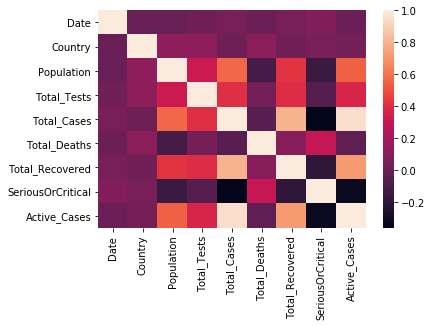

In [12]:
# checking correlation using heatmap

dfcor=df.corr()
sns.heatmap(dfcor)

column name Population ,Total_Tests , Total_Cases , Total_Recovered are correlated 

# Data Visualization - Unvariate plot / Multivariate Plots

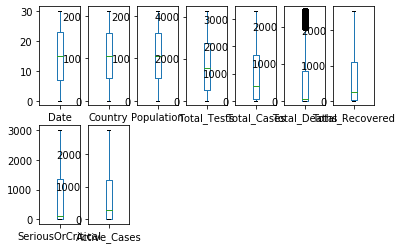

In [13]:
df.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
plt.show()

Above plot shows no outliers present

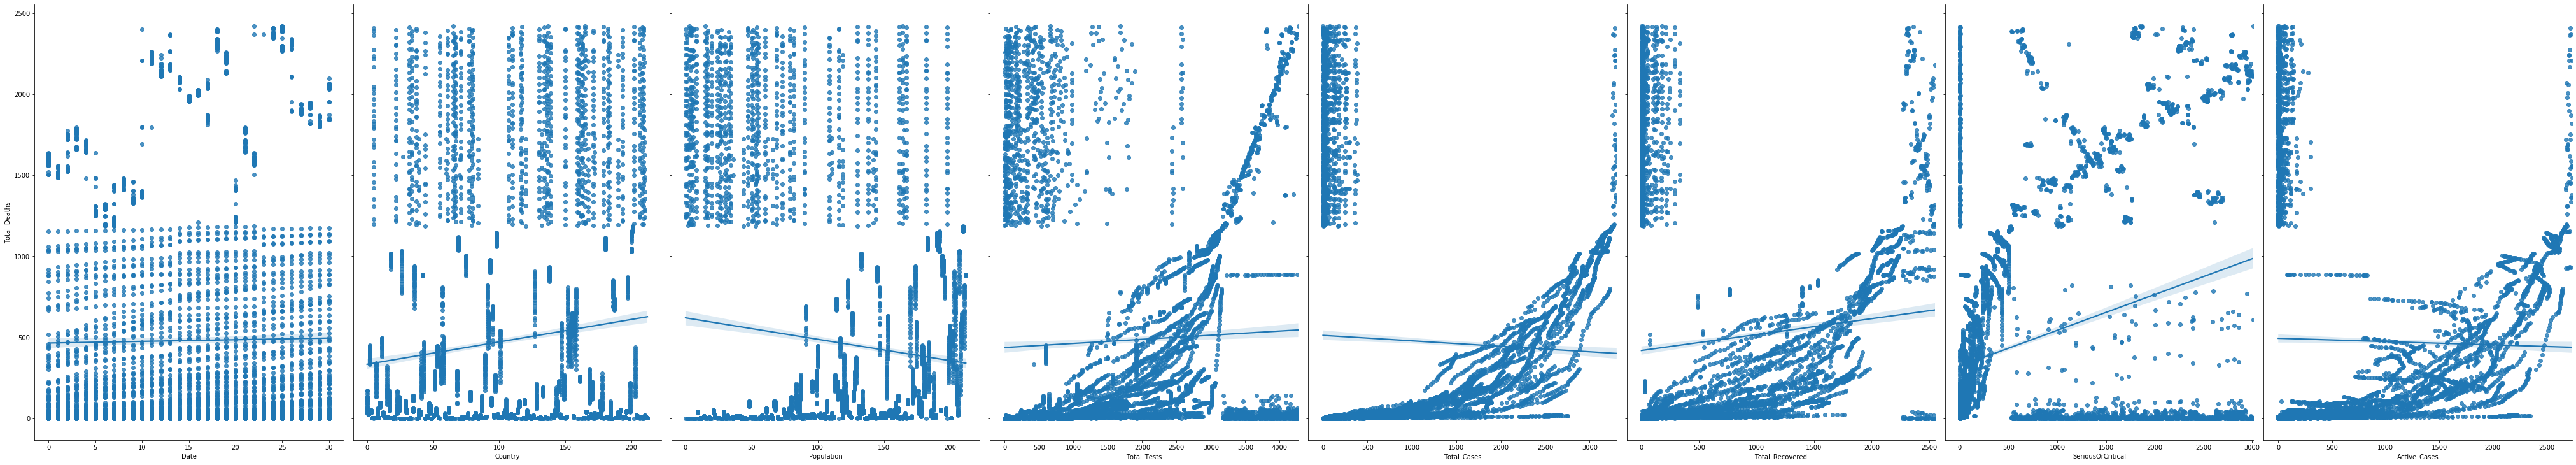

In [14]:
# draw Scatter plot for linear regression

sns.pairplot(df, x_vars=['Date', 'Country', 'Population', 'Total_Tests', 'Total_Cases', 'Total_Recovered', 'SeriousOrCritical', 'Active_Cases'], y_vars='Total_Deaths', size=10, aspect=0.7, kind='reg')
plt.show()

Columns with positive relation - country , Total_Tests, Total_Cases , Total_Recovered , SeriousOrCritical, Active_Cases

In [15]:
# Checking for skewness for each of the column
df.skew()

Date                 0.000000
Country              0.000000
Population           0.000000
Total_Tests          0.318411
Total_Cases          0.857386
Total_Deaths         1.370458
Total_Recovered      1.078498
SeriousOrCritical    1.069831
Active_Cases         1.053891
dtype: float64

In [16]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(6603, 9)
(6603, 9)


In [17]:
# Separating target & input variables
import numpy as np

df_x=df_final.drop(columns=["Total_Deaths"])
y=df_final[["Total_Deaths"]]

In [18]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [19]:
# Checking for skewness for each of the column again
df.skew()

Date                 0.000000
Country              0.000000
Population           0.000000
Total_Tests          0.318411
Total_Cases          0.857386
Total_Deaths         1.370458
Total_Recovered      1.078498
SeriousOrCritical    1.069831
Active_Cases         1.053891
dtype: float64

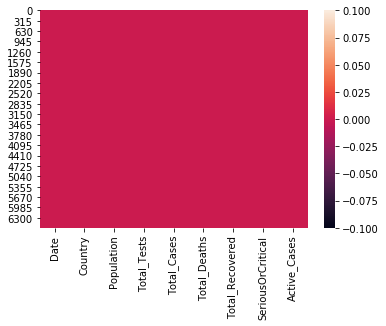

In [20]:
# check missing values
sns.heatmap(df.isnull())

In [21]:
import pandas as pd

X = df[['Country', 'Total_Recovered', 'SeriousOrCritical']]
y = df.Total_Deaths        # y is a vector, hence we use dot to access 'label'

In [22]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(6603, 3)


In [23]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(6603,)


In [24]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.30)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4622, 3)
(1981, 3)
(4622,)
(1981,)


In [25]:
# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Interpreting model coefficients
# print the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)


96.25849097874232
[1.20821859 0.14381179 0.23966076]


In [27]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [28]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the datasets
dataset = df

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)    
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.11785498049615124
1.0


In [29]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the datasets
dataset = df

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train) 
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028FB6261C08>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.11785498049571305
0.9758782636842702


In [30]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  498.0251704695681
Mean Sqr Error:    424947.3644816958
Root mean sqr error:  651.879869670552


In [31]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.30)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.30)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 55  is  0.15234877235749666


In [32]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split

# we can officially put values as 0.001,0.01,0.1,1.0 for alpha

# will reduce the coefficient to zero (those feature are not informative)
# Default value of alpha = 1.0
# alpha =0.01

ls=Lasso(alpha=1.0)
ls.fit(X_train,y_train) 
ls.score(X_train,y_train)

train_score=ls.score(X_train, y_train)
test_score=ls.score(X_test, y_test)

ls.coef_

print ("linear lasso train score:", train_score)
print ("linear lasso test score:", test_score)

linear lasso train score: 0.12522784778183071
linear lasso test score: 0.11425561557191144


In [33]:
# check if shape mismatch error thrown then check value of feature_names,coef ,both valu should be same only
# try to minimize coe variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

rd=Ridge(alpha=0.001)
rd.fit(X_train,y_train) 
rd.score(X_train,y_train)


Ridge_train_score=ls.score(X_train, y_train)
Ridge_test_score=ls.score(X_test, y_test)

ls.coef_

print ("Ridge train score:", Ridge_train_score)
print ("Ridge test score:", Ridge_test_score)

Ridge train score: 0.12522784778183071
Ridge test score: 0.11425561557191144


In [34]:
# check if shape mismatch error thrown then check value of feature_names,coef ,both valu should be same only
# try to minimize coe variable

# ElasticNet is a combination of both Lasso & Ridge

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

enr=ElasticNet(alpha=0.001)
enr=ElasticNet()
enr.fit(X_train,y_train)


El_train_score=ls.score(X_train, y_train)
El_test_score=ls.score(X_test, y_test)

ls.coef_

print ("EL train score:", El_train_score)
print ("EL test score:", El_test_score)

EL train score: 0.12522784778183071
EL test score: 0.11425561557191144


In [35]:
from sklearn.svm import SVR

svr = SVR(kernel = "linear")
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))
pred_y=svr.predict(X_test)
print(pred_y)

-0.18255656415952615
[131.75908236  -4.30610819 234.97517849 ...  -0.99923191 640.39505414
 308.77136127]


In [36]:
from sklearn.svm import SVR

svr = SVR(kernel = "poly")
svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_y=svr.predict(X_test)
print(pred_y)

[ 12.04124865  13.64139133  54.46391595 ...  13.73480843 784.13540843
 112.52938357]


In [37]:
from sklearn.svm import SVR

svr = SVR(kernel = "rbf")
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))
pred_y=svr.predict(X_test)
print(pred_y)

-0.23431990056523033
[ 35.24909797  16.35705351  82.59272609 ...  17.69180791 419.6511801
 150.60031009]


In [38]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 11.43 %


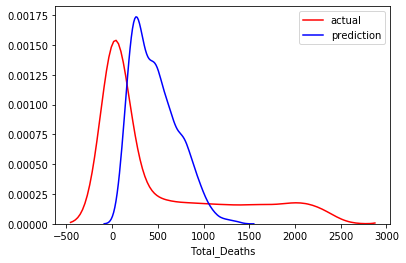

In [39]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-This model facing overfitting issue,givs very less score for linear regression